<a href="https://colab.research.google.com/github/PradnyaPagar01/Play-Store-App-Review-Analysis/blob/main/02_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## Android is being adopted by a large population across the globe. Android is used in over 74% of the world market, so it's worth creating or developing apps for this mobile operating system.
## It's also worth investing in apps if you expect them to gain wider traction in the future. To make sure apps are tailored to the needs of users the analysis of data from the Google Play Store apps is extremely valuable. 
## It can help developers design apps that are tailored to what users want and investors with decisions about how best to invest in future.
## </b> Let's start the working on Data. </b>

# **A. Importing Libraries**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# Importing Data Set
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
file_path = '/content/drive/MyDrive/Colab Notebooks/project1_play_store_data/Play Store Data.csv'
playstore_df = pd.read_csv(file_path)


# **B. Examine and read the Data Summary**

In [9]:
# Verify the type of data we are going to study
type(playstore_df)

pandas.core.frame.DataFrame

In [10]:
# Inspecting the first five rows of the Data set 
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
# Printing the tail of Data set which is last 5 rows
playstore_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [12]:
# Printing The shape oF Data set
playstore_df.shape

(10841, 13)

We have total 10841 Rows and 13 Columns in the Data Set.

In [13]:
# Printing the information of Dataset to get the better idea of Data type and Memory use 
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


The info() function is used to print a brief summary of a DataFrame which prints the shape of data i.e. number of rows(entries) and number of columns.This method prints information about a Data Frame including the index dtype and column dtypes, non-null counts and memory usage.

In [14]:
# Printing the Statistics summary
playstore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

# **C. Data Cleaning** 

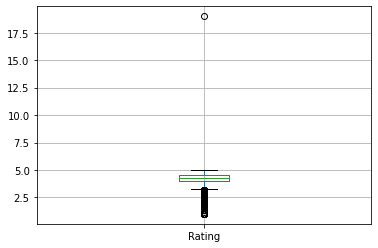

In [15]:
# lets plot a Box plot for rating column to get some idea about the rating columns
playstore_df.boxplot();

A box plot is a method for graphically depicting groups of numerical data through their quartiles.This represents the average of this numerical data.
From above observasion we can see there are values which are greater than 5. The rating of any apps has to be max 5 not greater than it so lets try to find out this outlier.


In [16]:
        # Checking how many outliers are there in Rating column and lets find out which row it is
playstore_df[playstore_df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [17]:
# The category, Rating and Reviews Column have irregular data so i'am dropping this row having an index 10472
playstore_df.drop([10472], inplace = True)

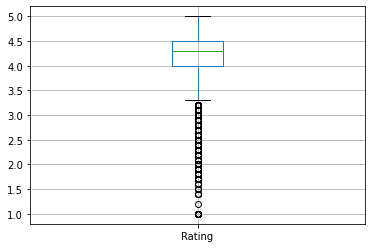

In [18]:
# Lets check do i successfully droped the unwanted column 
playstore_df.boxplot();

# **D. Data Processing**

## Handling Data Types of each Feature

In [19]:
# 1) clean the 'Reviews' data and change the type 'object' to 'float'
reviews = [i for i in playstore_df['Reviews']]

def clean_reviews(reviews_list):
    """
    As 'M' has been found the in reviews data, this function
    replace it with million
    """
    cleaned_data = []
    for review in reviews_list:
        if 'M' in review:
            review = review.replace('M', '')
            review = float(review) * 1000000  # 1M = 1,000,000
        cleaned_data.append(review)
    return cleaned_data

playstore_df['Reviews'] = clean_reviews(reviews)
playstore_df['Reviews'] = playstore_df['Reviews'].astype(float)

Other Features like Size, Installs, Price and Android Vers also must be of numeric type. The values they are holding must be changed to a proper format so that we can use them for analysis and plots. Example : '10000+' to 10000

In [20]:
# 2) clean the 'Size' data and change the type 'object' to 'float'

# found value with '1,000+' in one of record, remove it from data_frame as uncertain whether it is 'M' or 'k'
index = playstore_df[playstore_df['Size'] == '1,000+'].index
playstore_df.drop(axis=0, inplace=True, index=index)

sizes = [i for i in playstore_df['Size']]

def clean_sizes(sizes_list):
    """
    As sizes are represented in 'M' and 'k', we remove 'M'
    and convert 'k'/kilobytes into megabytes
    """
    cleaned_data = []
    for size in sizes_list:
        if 'M' in size:
            size = size.replace('M', '')
            size = float(size)
        elif 'k' in size:
            size = size.replace('k', '')
            size = float(size)
            size = size/1024  # 1 megabyte = 1024 kilobytes
        # representing 'Varies with device' with value 0
        elif 'Varies with device' in size:
            size = float(0)
        cleaned_data.append(size)
    return cleaned_data

playstore_df['Size'] = clean_sizes(sizes)
playstore_df['Size'] = playstore_df['Size'].astype(float)

In [21]:
# 3) clean the 'Installs' data and change the type 'object' to 'float'
installs = [i for i in playstore_df['Installs']]

def clean_installs(installs_list):
    cleaned_data = []
    for install in installs_list:
        if ',' in install:
            install = install.replace(',', '')
        if '+' in install:
            install = install.replace('+', '')
        install = int(install)
        cleaned_data.append(install)
    return cleaned_data
        
playstore_df['Installs'] = clean_installs(installs)
playstore_df['Installs'] = playstore_df['Installs'].astype(float)

In [22]:
# 4) clean the 'Price' data and change the type 'object' to 'float'
prices = [i for i in playstore_df['Price']]

def clean_prices(prices_list):
    cleaned_data = []
    for price in prices_list:
        if '$' in price:
            price = price.replace('$', '')
        cleaned_data.append(price)
    return cleaned_data

playstore_df['Price'] = clean_prices(prices)
playstore_df['Price'] = playstore_df['Price'].astype(float)

In [23]:
# look at the random 10 records in the apps dataframe to verify the cleaned columns
playstore_df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7590,Wrecker's Revenge - Gumball,FAMILY,4.3,2263.0,55.000000,100000.0,Free,0.00,Everyone,Puzzle;Action & Adventure,"September 21, 2017",14.15,4.3 and up
8431,D. H. Lawrence Poems FREE,BOOKS_AND_REFERENCE,NaN,13.0,0.919922,1000.0,Free,0.00,Everyone,Books & Reference,"November 22, 2013",1.11,2.3.3 and up
3091,"Yahoo Sports - scores, stats, news, & highlights",SPORTS,4.5,32386.0,19.000000,1000000.0,Free,0.00,Everyone,Sports,"August 1, 2018",7.8.0,5.1 and up
10737,FP Legacy,MAPS_AND_NAVIGATION,4.0,3.0,44.000000,1000.0,Free,0.00,Everyone,Maps & Navigation,"July 2, 2018",3.4.0,4.0 and up
7365,ricardo.ch,SHOPPING,4.0,13232.0,27.000000,500000.0,Free,0.00,Everyone,Shopping,"July 21, 2018",7.5.1,4.1 and up
8310,Escape the Prison Room,FAMILY,3.5,113183.0,36.000000,5000000.0,Free,0.00,Everyone,Puzzle,"December 15, 2017",10.6,4.1 and up
5846,YAKALA AY,GAME,NaN,0.0,14.000000,1.0,Paid,0.99,Everyone,Arcade,"July 7, 2018",1.0,4.1 and up
1074,Credit Karma,FINANCE,4.7,706301.0,0.000000,10000000.0,Free,0.00,Everyone,Finance,"July 31, 2018",Varies with device,Varies with device
7156,CD Events,BUSINESS,NaN,1.0,9.500000,100.0,Free,0.00,Everyone,Business,"March 27, 2015",0.9.0,2.3.3 and up
6163,YourTube Video Views BG,VIDEO_PLAYERS,NaN,8.0,2.500000,500.0,Free,0.00,Everyone,Video Players & Editors,"November 12, 2015",1.1.1,4.0 and up


###  Handling null values in Data

In [24]:
# counting the number of missing values in the dataframe format
playstore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Here, we realized that there are 1474 rows having null values under column 'Rating'. Hence, we decided to replace the null values with median of overall 'Rating' values.

In [25]:
def replace_with_median(series):
    """
    Given a series, replace the rows with null values 
    with median values
    """
    return series.fillna(series.median())

playstore_df['Rating'] = playstore_df['Rating'].transform(replace_with_median)
playstore_df['Rating'] = playstore_df['Rating'].astype(float)

Then we apply mode for the Current_Ver,Android__Ver and Type.

In [26]:
print(playstore_df['Type'].mode())
print(playstore_df['Current Ver'].mode())
print(playstore_df['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [27]:
playstore_df['Type'].fillna(str(playstore_df['Type'].mode().values[0]),inplace=True)
playstore_df['Current Ver'].fillna(str(playstore_df['Current Ver'].mode().values[0]),inplace=True)
playstore_df['Android Ver'].fillna(str(playstore_df['Android Ver'].mode().values[0]),inplace=True)

In [28]:
#dropping duplicates value in 'App' column using drop_duplicates() function
playstore_df.drop_duplicates(subset='App',inplace=True)

In [29]:
#Lets check the modified data
playstore_df.shape

(9659, 13)

Hence we successfully droped all the duplicates values and Data is ready for analysis.

In [30]:
# check on statistical information of the dataframe
playstore_df.describe()

,Rating,Reviews,Size,Installs,Price
count,9659.000000,9.659000e+03,9659.000000,9.659000e+03,9659.000000
mean,4.192442,2.165926e+05,17.804097,7.777507e+06,1.099299
std,0.496397,1.831320e+06,21.495518,5.375828e+07,16.852152
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,2.900000,1.000000e+03,0.000000
50%,4.300000,9.670000e+02,9.100000,1.000000e+05,0.000000
75%,4.500000,2.940100e+04,25.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


# **E. Exploratory Data Analysis and Visualization**

## **1.Find the percentage of app of top 25 and bottom 25 category.**

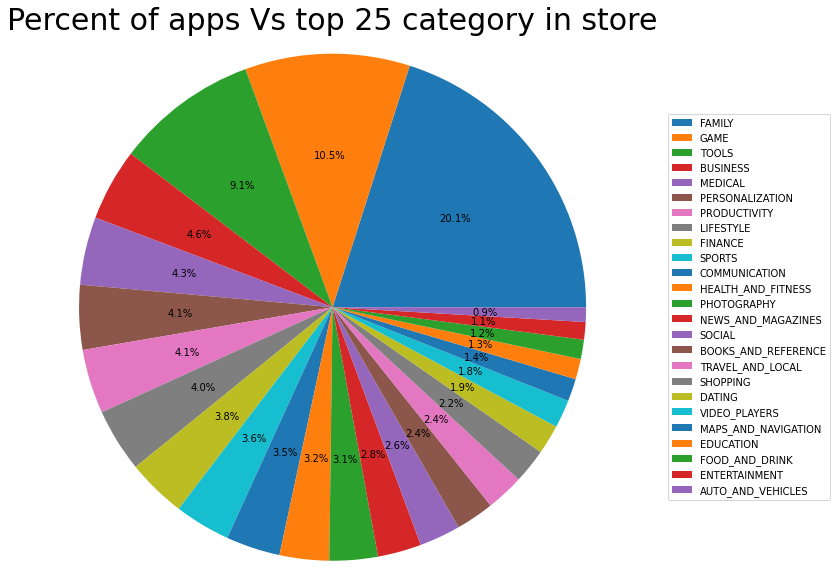

In [38]:
#Basic pie chart to view distribution of apps across top 25 categories
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

number_of_apps = playstore_df['Category'].value_counts().head(25)

labels = number_of_apps.index
sizes = number_of_apps.values

ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")
plt.title('Percent of apps Vs top 25 category in store',size = 30)
plt.show()

Hence we know that most of the apps in the play store are from the categories of  'Family', 'Game' and also 'Tools.

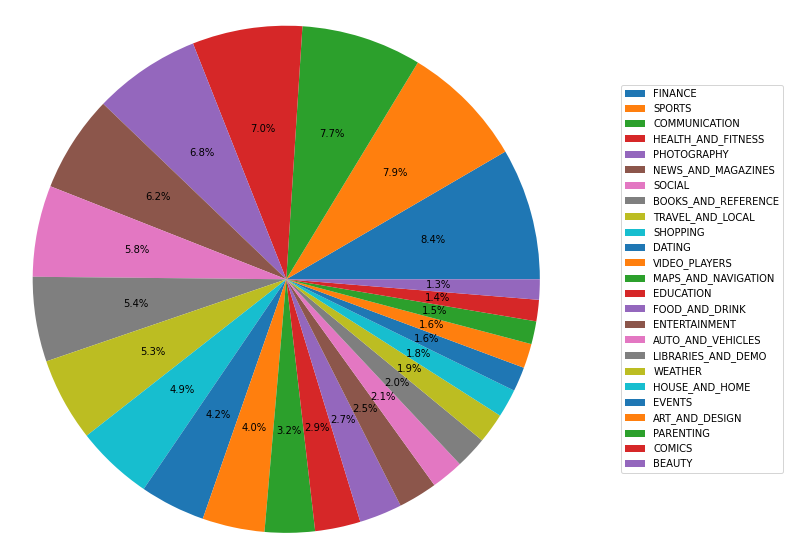

In [37]:
#Basic pie chart to view distribution of apps across last 25 categories
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

number_of_apps = playstore_df['Category'].value_counts().tail(25)

labels = number_of_apps.index
sizes = number_of_apps.values

ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")
plt.show()

## **2. Study the distribution of apps in term of their type i.e. free Vs paid.**

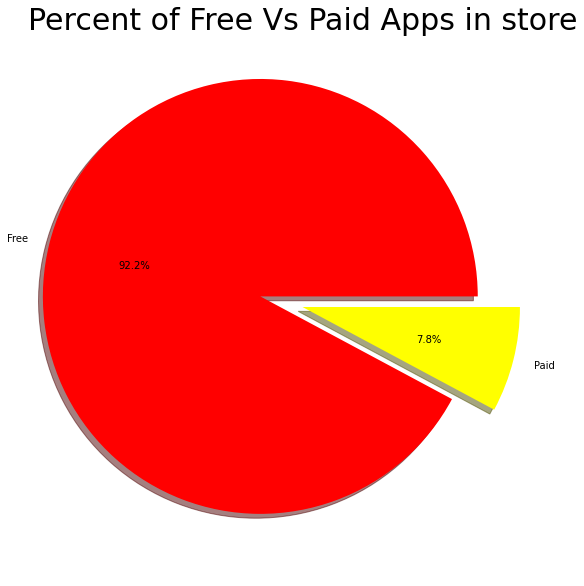

In [32]:
# Visualisation of free and paid apps on playstore
plt.figure(figsize=(10,10))
labels = playstore_df['Type'].value_counts(sort = True).index
sizes = playstore_df['Type'].value_counts(sort = True)
colors = ["red","yellow"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 30)
plt.show()


Such that we can study there are approximate 92% apps are free and 7-8 % apps are paid.


# **3. Study the distribution of average apps rating .**

In [48]:
# Average App Rating in each Category
avg_rating = playstore_df.groupby('Category')['Rating'].mean()
print(avg_rating)

Category
ART_AND_DESIGN         4.354687
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.334234
BUSINESS               4.173810
COMICS                 4.185714
COMMUNICATION          4.154921
DATING                 4.041520
EDUCATION              4.363866
ENTERTAINMENT          4.135294
EVENTS                 4.395313
FAMILY                 4.194378
FINANCE                4.138551
FOOD_AND_DRINK         4.192857
GAME                   4.249948
HEALTH_AND_FITNESS     4.251736
HOUSE_AND_HOME         4.174324
LIBRARIES_AND_DEMO     4.207143
LIFESTYLE              4.131436
MAPS_AND_NAVIGATION    4.062595
MEDICAL                4.202025
NEWS_AND_MAGAZINES     4.156693
PARENTING              4.300000
PERSONALIZATION        4.325532
PHOTOGRAPHY            4.166548
PRODUCTIVITY           4.206150
SHOPPING               4.237624
SOCIAL                 4.255230
SPORTS                 4.232923
TOOLS                  4.073881
TRAVEL_AND_LOCAL       4.103196

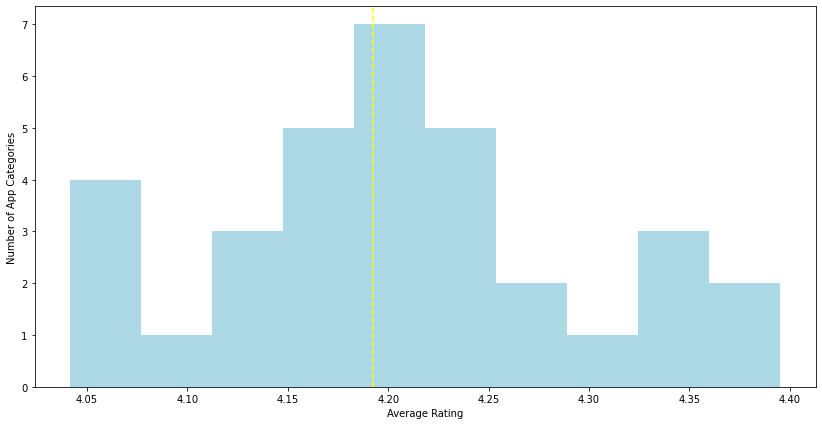

In [53]:
# Plot a histogram for Average Rating
fig, ax = plt.subplots(figsize = (14,7))
ax.hist(avg_rating,color='lightblue')
ax.axvline(playstore_df['Rating'].mean(),color='yellow',linestyle='--')
plt.xlabel('Average Rating')
plt.ylabel('Number of App Categories')
plt.show()

## **4. Study the distribution of apps in term of their rating, size and type.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


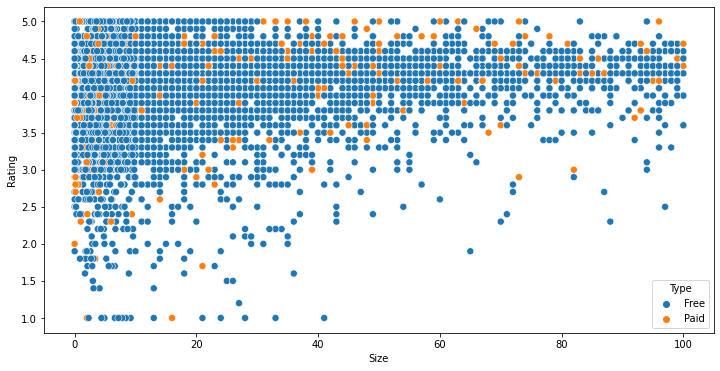

In [39]:
# show the distribution of apps in term of their rating, size and type
plt.figure(figsize=(12, 6))
sns.scatterplot(playstore_df['Size'],
               playstore_df['Rating'],
               hue=playstore_df['Type'],
               s=50)

From this scatter plot, we can imply that majority of the free apps are small in size and having high rating. While for paid apps, we have quite equal distribution in term on size and rating.

## **5. Study the distribution of apps in term of Content Rating.**

In [54]:
# Number of apps in terms of Content Rating
content_rating = playstore_df['Content Rating'].value_counts()
content_rating

Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

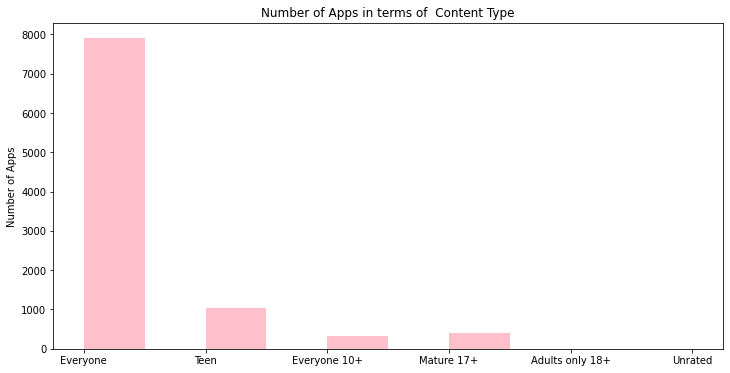

In [58]:
# Distribute the number of apps Vs their Content Rating
fig = plt.figure(figsize = (12,6))
plt.hist(playstore_df['Content Rating'], color = 'pink')
plt.title('Number of Apps in terms of  Content Type')
plt.ylabel('Number of Apps')
plt.show()
fig.savefig('Number of Apps in terms of Content Type')

## **6. Finding and Counting the numbers of 5 star rating appa.**

In [42]:
# Number of apps having 5 star rating
full_rating = playstore_df[playstore_df.Rating == 5]
full_rating.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15.0,37.0,1000.0,Free,0.0,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up
612,American Girls Mobile Numbers,DATING,5.0,5.0,4.4,1000.0,Free,0.0,Mature 17+,Dating,"July 17, 2018",3.0,4.0.3 and up
615,Awake Dating,DATING,5.0,2.0,70.0,100.0,Free,0.0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up
633,Spine- The dating app,DATING,5.0,5.0,9.3,500.0,Free,0.0,Teen,Dating,"July 14, 2018",4.0,4.0.3 and up
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6.0,5.0,100.0,Free,0.0,Mature 17+,Dating,"August 1, 2018",8.2,4.0.3 and up


In [43]:
# Number of apps having 5 star rating
full_rating = playstore_df[playstore_df.Rating == 5]
total_full_rating = full_rating['App'].count()
print(f'There are  {total_full_rating} apps having 5 star rating. ')

There are  271 apps having 5 star rating. 
